In [284]:
using LibSndFile, SampledSignals, PyPlot
include("/Users/marui/Dropbox/_julia/audioutil.jl");

# making swept-sine

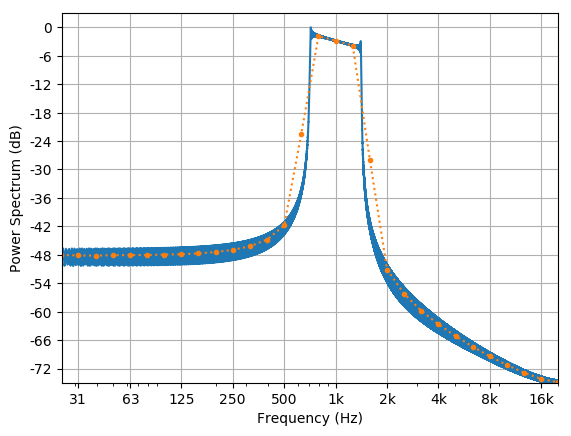

In [285]:
duration = 5.0;
fs = 44100;
frange = (1, fs/2);
#frange = (1000/sqrt(2), 1000*sqrt(2));

fL = frange[1] * 2pi;
fH = frange[2] * 2pi;
t = (0:duration*fs-1) / fs;

if true
    # log sweep
    L = duration / log(fH / fL);
    K = fL * L;
    x = sin.(K * (exp.(t/L) - 1.0));
else
    # linear sweep
    f = (t .* (t/duration * (fH - fL)) + fL) / 2;
    x = sin.(fL*t + (fH-fL)/duration*t.^2/2);
end

plot_magnitude(x, fs);

buf = SampleBuf(map(PCM16Sample, normalize_signal(x)), fs);
save("sweep.flac", buf);
#buf = SampleBuf(x, fs);
#save("sweep.wav", buf);

# phase randomization

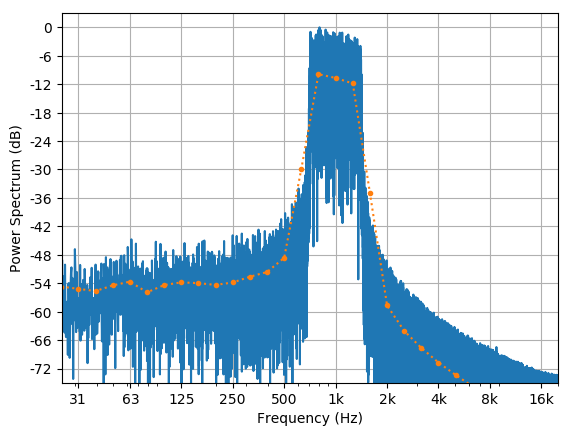

In [286]:
X = fft(x);
p = randperm(floor(Int, length(X)/2-1))+1;
Y_mag = abs.(X);
Y_phase = angle.(X);
Y_phase[2:floor(Int, length(X)/2)] = angle.(X[p]);
Y_phase[end:-1:floor(Int, length(X)/2)+2] = angle.(X[length(X)-p+1]);
y = real(ifft(Y_mag .* exp.((1im) * Y_phase)));

y = fadeout(fadein(freeze(y), duration/50, fs), duration/50, fs);
y = remove_dc_offset(y);

plot_magnitude(y, fs);

buf = SampleBuf(map(PCM16Sample, normalize_signal(y)), fs);
save("sweep_rand.flac", buf);

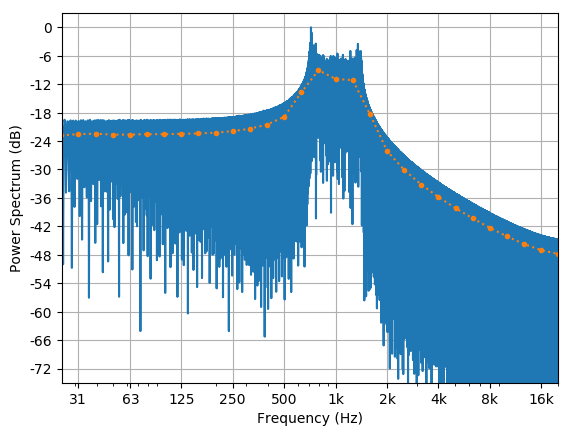

In [287]:
z = freeze(x);
plot_magnitude(z, fs);

z = fadeout(fadein(freeze(z), duration/50, fs), duration/50, fs);
z = remove_dc_offset(z);

buf = SampleBuf(map(PCM16Sample, normalize_signal(z)), fs);
save("sweep_rand2.flac", buf);